## 6.4 Machine Learning 

### This script contains the following:

 1. Importing libraries and data
 2. Data cleaning
 3. Data prep for regression analysis
 4. Regression analysis

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\Jeet\Desktop\task6'

In [4]:
df = pd.read_pickle(os.path.join(path,'Renting_apartment_data'))

### 2. Data cleaning

In [5]:
df.columns

Index(['State', 'Service_charge', 'Base_rent', 'Total_rent',
       'Calculated_total_rent', 'Telekom-Tv Offer', 'Newly_construction',
       'Balcony', 'No of Pictures ', 'Price trend', 'Telekom Upload Speed',
       'Constructed    Year', 'Scout ID', 'Parking Space', 'Kitchen', 'cellar',
       'Living_space_area', 'Pets_allowed', 'Lift', 'Type of Flat',
       'Number of Rooms', 'Garden', 'Living Space Range',
       'Date of posted Ads'],
      dtype='object')

In [6]:
df.head(20)

,State,Service_charge,Base_rent,Total_rent,Calculated_total_rent,Telekom-Tv Offer,Newly_construction,Balcony,No of Pictures,Price trend,...,Kitchen,cellar,Living_space_area,Pets_allowed,Lift,Type of Flat,Number of Rooms,Garden,Living Space Range,Date of posted Ads
0,Nordrhein_Westfalen,245.00,595.00,840.00,840.00,ONE_YEAR_FREE,False,False,6,4.62,...,False,True,86.00,NaN,False,ground_floor,4,True,4,May-19
1,Rheinland_Pfalz,134.00,800.00,NaN,934.00,ONE_YEAR_FREE,False,True,8,3.47,...,False,False,89.00,no,False,ground_floor,3,False,4,May-19
2,Sachsen,255.00,965.00,1300.00,1220.00,ONE_YEAR_FREE,True,True,8,2.72,...,False,True,83.80,NaN,True,apartment,3,False,4,Oct-19
3,Sachsen,58.15,343.00,NaN,401.15,ONE_YEAR_FREE,False,True,9,1.53,...,False,False,58.15,NaN,False,other,3,False,2,May-19
4,Bremen,138.00,765.00,903.00,903.00,NONE,False,True,19,2.46,...,False,False,84.97,NaN,False,apartment,3,False,4,Feb-20
5,Schleswig_Holstein,142.00,315.20,NaN,457.20,NONE,False,True,5,4.48,...,True,False,53.43,no,False,apartment,2,False,2,Feb-20
6,Sachsen,70.00,310.00,380.00,380.00,ONE_YEAR_FREE,False,False,9,1.01,...,False,True,62.00,NaN,False,NaN,2,True,3,Feb-20
7,Bremen,88.00,452.25,584.25,540.25,ONE_YEAR_FREE,False,True,5,1.89,...,False,True,60.30,NaN,False,ground_floor,3,False,2,Feb-20
8,Baden-Wurttemberg,110.00,580.00,690.00,690.00,ONE_YEAR_FREE,False,False,5,3.77,...,True,True,53.00,no,False,roof_storey,2,False,2,Feb-20
9,Nordrhein_Westfalen,95.00,300.00,NaN,395.00,ONE_YEAR_FREE,False,False,7,1.92,...,False,True,60.00,negotiable,False,apartment,2,False,2,Oct-19


In [7]:
df.shape

(47241, 24)

In [8]:
# Rename the columns in the same way as in Exercise 6.2.

df.rename(columns = {'Price trend' : 'Price trend by Renting Market' }, inplace = True)

##### Missing values

In [9]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

State                                0
Service_charge                       0
Base_rent                            0
Total_rent                        6486
Calculated_total_rent                0
Telekom-Tv Offer                     0
Newly_construction                   0
Balcony                              0
No of Pictures                       0
Price trend by Renting Market      296
Telekom Upload Speed              5860
Constructed    Year               9964
Scout ID                             0
Parking Space                    31278
Kitchen                              0
cellar                               0
Living_space_area                    0
Pets_allowed                     19781
Lift                                 0
Type of Flat                      6547
Number of Rooms                      0
Garden                               0
Living Space Range                   0
Date of posted Ads                   1
dtype: int64

In [10]:
df.describe()

,Service_charge,Base_rent,Total_rent,Calculated_total_rent,No of Pictures,Price trend by Renting Market,Telekom Upload Speed,Constructed Year,Living_space_area
count,47241.000000,4.724100e+04,4.075500e+04,4.724100e+04,47241.000000,46945.000000,41381.000000,37277.000000,47241.000000
mean,151.186645,6.585406e+02,8.330360e+02,8.097272e+02,9.737685,3.281750,28.673522,1965.556778,72.860088
std,677.645103,5.698791e+03,6.167176e+03,5.743131e+03,6.360104,1.983928,16.398987,47.814640,31.800683
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-9.170000,1.000000,1111.000000,0.000000
25%,90.200000,3.289900e+02,4.590000e+02,4.370000e+02,6.000000,1.890000,10.000000,1943.000000,54.000000
50%,131.160000,4.700000e+02,6.260000e+02,6.050000e+02,9.000000,3.280000,40.000000,1972.000000,66.650000
75%,185.000000,7.800000e+02,9.650000e+02,9.500000e+02,13.000000,4.510000,40.000000,1996.000000,86.000000
max,146118.000000,1.234567e+06,1.234567e+06,1.234567e+06,121.000000,12.260000,100.000000,2029.000000,649.000000


In [11]:
df['Price trend by Renting Market'].fillna('mean', inplace=True)

In [12]:
df.isnull().sum()

State                                0
Service_charge                       0
Base_rent                            0
Total_rent                        6486
Calculated_total_rent                0
Telekom-Tv Offer                     0
Newly_construction                   0
Balcony                              0
No of Pictures                       0
Price trend by Renting Market        0
Telekom Upload Speed              5860
Constructed    Year               9964
Scout ID                             0
Parking Space                    31278
Kitchen                              0
cellar                               0
Living_space_area                    0
Pets_allowed                     19781
Lift                                 0
Type of Flat                      6547
Number of Rooms                      0
Garden                               0
Living Space Range                   0
Date of posted Ads                   1
dtype: int64

In [13]:
df.describe()

,Service_charge,Base_rent,Total_rent,Calculated_total_rent,No of Pictures,Telekom Upload Speed,Constructed Year,Living_space_area
count,47241.000000,4.724100e+04,4.075500e+04,4.724100e+04,47241.000000,41381.000000,37277.000000,47241.000000
mean,151.186645,6.585406e+02,8.330360e+02,8.097272e+02,9.737685,28.673522,1965.556778,72.860088
std,677.645103,5.698791e+03,6.167176e+03,5.743131e+03,6.360104,16.398987,47.814640,31.800683
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000,1111.000000,0.000000
25%,90.200000,3.289900e+02,4.590000e+02,4.370000e+02,6.000000,10.000000,1943.000000,54.000000
50%,131.160000,4.700000e+02,6.260000e+02,6.050000e+02,9.000000,40.000000,1972.000000,66.650000
75%,185.000000,7.800000e+02,9.650000e+02,9.500000e+02,13.000000,40.000000,1996.000000,86.000000
max,146118.000000,1.234567e+06,1.234567e+06,1.234567e+06,121.000000,100.000000,2029.000000,649.000000


##### Duplicates check

In [14]:
dups = df.duplicated()

In [15]:
dups.shape # No dups

(47241,)

#### Checking data type

In [16]:
df.dtypes

State                              object
Service_charge                    float64
Base_rent                         float64
Total_rent                        float64
Calculated_total_rent             float64
Telekom-Tv Offer                   object
Newly_construction                   bool
Balcony                              bool
No of Pictures                      int64
Price trend by Renting Market      object
Telekom Upload Speed              float64
Constructed    Year               float64
Scout ID                           object
Parking Space                    category
Kitchen                              bool
cellar                               bool
Living_space_area                 float64
Pets_allowed                     category
Lift                                 bool
Type of Flat                     category
Number of Rooms                  category
Garden                               bool
Living Space Range               category
Date of posted Ads                

#### Extreme values checks

<AxesSubplot:xlabel='Living_space_area', ylabel='Density'>

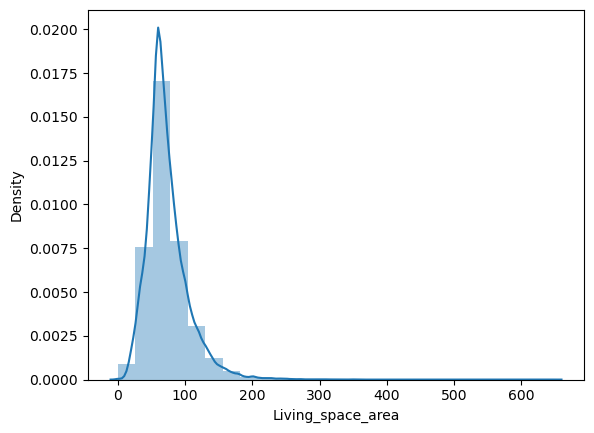

In [18]:
sns.distplot(df['Living_space_area'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [20]:
# Check the mean
df['Living_space_area'].mean() 

72.86008848246249

In [22]:
 # Check the median
df['Living_space_area'].median()

66.65

In [23]:
# Check the max
df['Living_space_area'].max() 

649.0

### 3. Data prep for regression analysis 

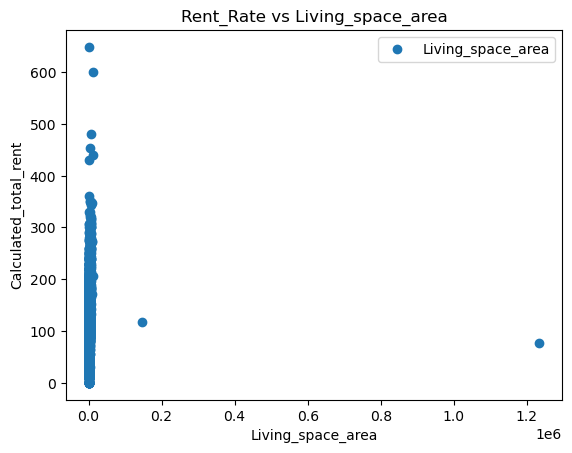

In [26]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Calculated_total_rent', y='Living_space_area',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Rent_Rate vs Living_space_area')  
plt.xlabel('Living_space_area')  
plt.ylabel('Calculated_total_rent')  
plt.show()

In [27]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Living_space_area'].values.reshape(-1,1)
y = df['Calculated_total_rent'].values.reshape(-1,1)

In [28]:
X

array([[ 86. ],
       [ 89. ],
       [ 83.8],
       ...,
       [ 60. ],
       [120. ],
       [ 57.8]])

In [29]:
y

array([[ 840.],
       [ 934.],
       [1220.],
       ...,
       [ 432.],
       [1150.],
       [ 447.]])

In [30]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

### Hypothesis1: If the Living space area are more, the rent price is also more.

In [31]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [32]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [33]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

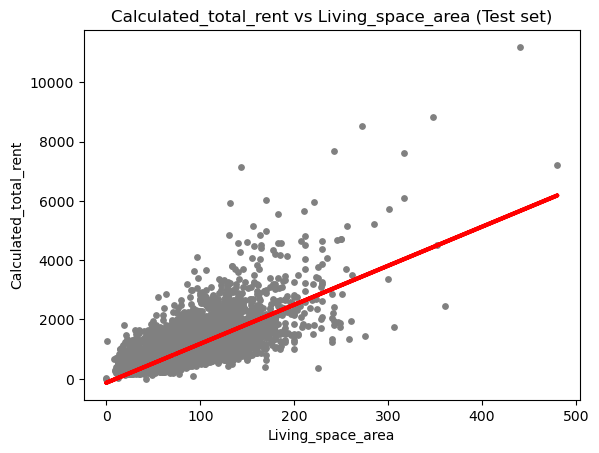

In [34]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Calculated_total_rent vs Living_space_area (Test set)')
plot_test.xlabel('Living_space_area')
plot_test.ylabel('Calculated_total_rent')
plot_test.show()

In [35]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [36]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[13.16622539]]
Mean squared error:  141453.30844013792
R2 score:  0.5440948240653467


In [37]:
y_predicted

array([[ 775.57216372],
       [ 416.79252177],
       [ 644.56822106],
       ...,
       [ 508.95609952],
       [1009.27266443],
       [ 844.56318477]])

In [38]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,595.00,775.572164
1,460.00,416.792522
2,377.00,644.568221
3,610.00,850.487986
4,514.17,710.004361
5,1187.44,1614.919032
6,708.00,917.109087
7,536.10,711.057659
8,475.00,602.041313
9,720.00,1127.768693


##### Compare how the regression fits the training set

In [39]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [40]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [41]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[13.16622539]]
Mean squared error:  46810944.18961983
R2 score:  0.0037218633586797445


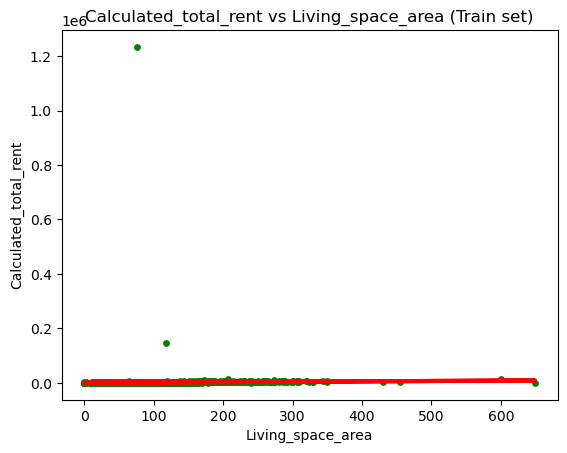

In [42]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Calculated_total_rent vs Living_space_area (Train set)')
plot_test.xlabel('Living_space_area')
plot_test.ylabel('Calculated_total_rent')
plot_test.show()

#### The summary statistics of the model confirm that the model is inaccurate. Which can also be seen by the variance in the actual vs prdicted values. An R2 score of 0.0037 indicates a very poor fit and the large MSE  difference also confirms that data point is not around the regression line.